In [157]:
# Import libraries and load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from tensorflow import keras



In [159]:
# Load the breast cancer dataset

breast_cancer_data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)



In [161]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [163]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data loaded and preprocessed.")
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)



Data loaded and preprocessed.
Shape of training data: (455, 30)
Shape of testing data: (114, 30)


In [165]:
# Define and train the models
# Random Forest (Random Tree Ensemble)
rf_model = RandomForestClassifier(n_estimators=50, random_state=30)
rf_model.fit(X_train_scaled, y_train)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Neural Network (Keras)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10, verbose=0)

print("Models trained successfully.")



Models trained successfully.


In [166]:
#  Evaluate models
models = {
    "Random Forest": rf_model,
    "Neural Network": model,
    "Naive Bayes": nb_model
}

results = {}
accuracy_results = {}

for name, model in models.items():
    if name == "Neural Network":
        y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)
    else:
        y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "accuracy": accuracy,
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred)
    }
    accuracy_results[name] = accuracy
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(results[name]["classification_report"])




Random Forest Results:
Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

4/4 [==============================] - 0s 2ms/step

Neural Network Results:
Accuracy: 0.9912
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


Naive Bayes Results:
Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      

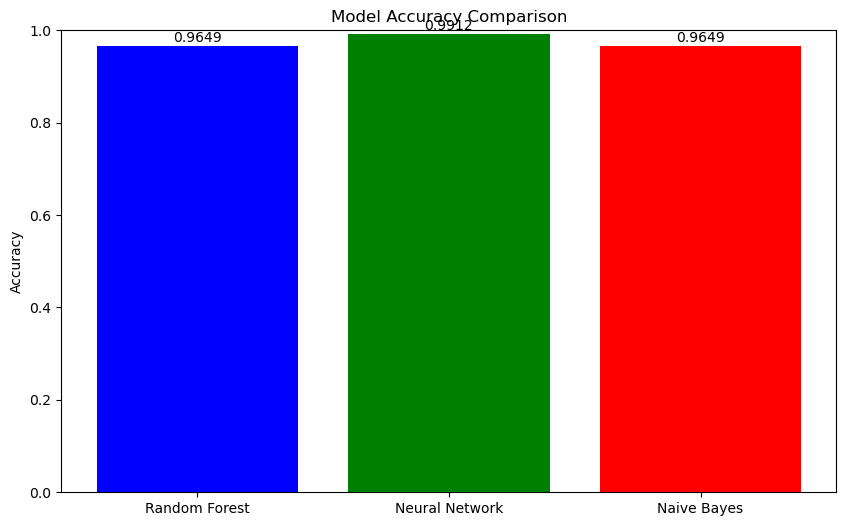

In [167]:
#  Visualize results
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'red'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, (model, accuracy) in enumerate(accuracy_results.items()):
    plt.text(i, accuracy + 0.01, f'{accuracy:.4f}', ha='center')
plt.show()



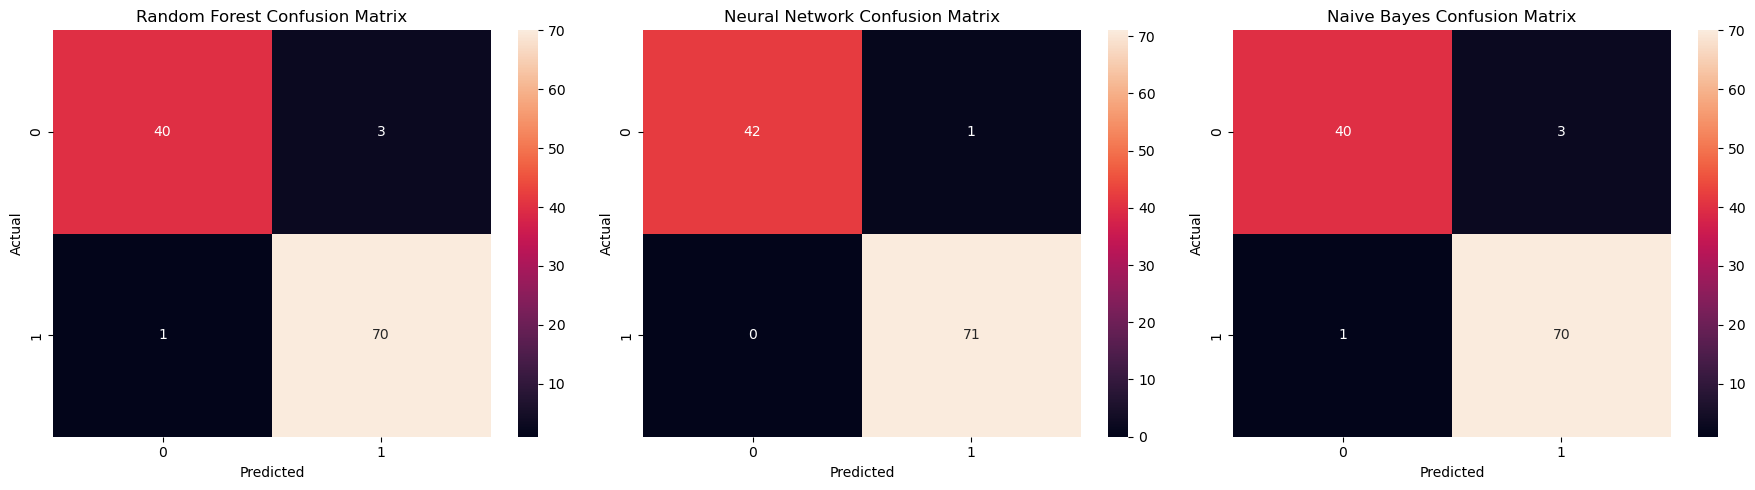

In [168]:
# Cell 5: Confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, model) in enumerate(models.items()):
    sns.heatmap(results[name]["confusion_matrix"], annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()



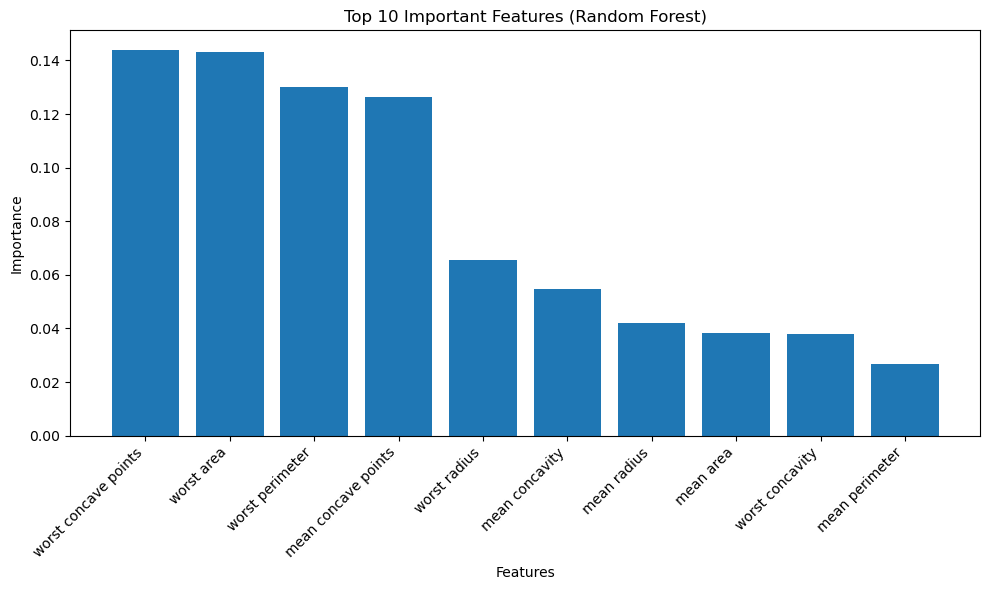

In [169]:
# Feature importance for Random Forest
feature_importance = rf_model.feature_importances_
feature_importance_sorted = sorted(zip(feature_importance, X.columns), reverse=True)
top_features = feature_importance_sorted[:10]

plt.figure(figsize=(10, 6))
plt.bar([x[1] for x in top_features], [x[0] for x in top_features])
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



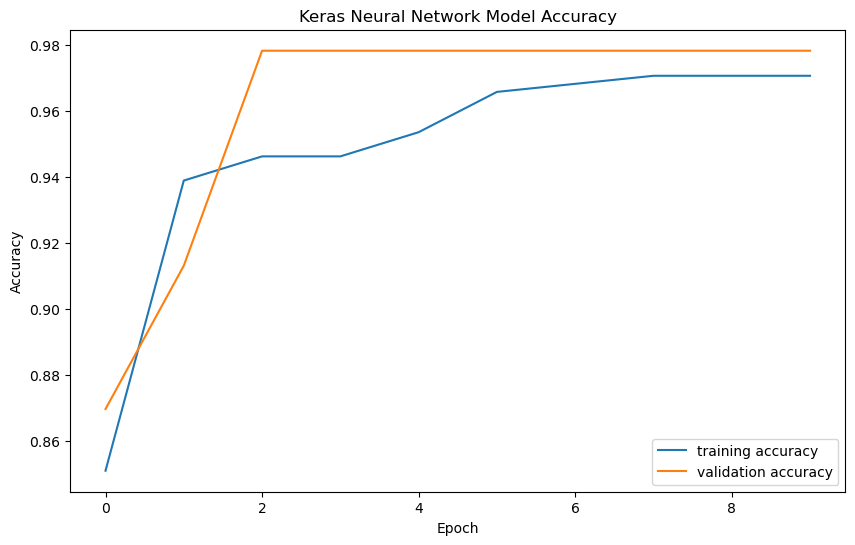

In [170]:
# Cell 7: Neural Network learning curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Keras Neural Network Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()



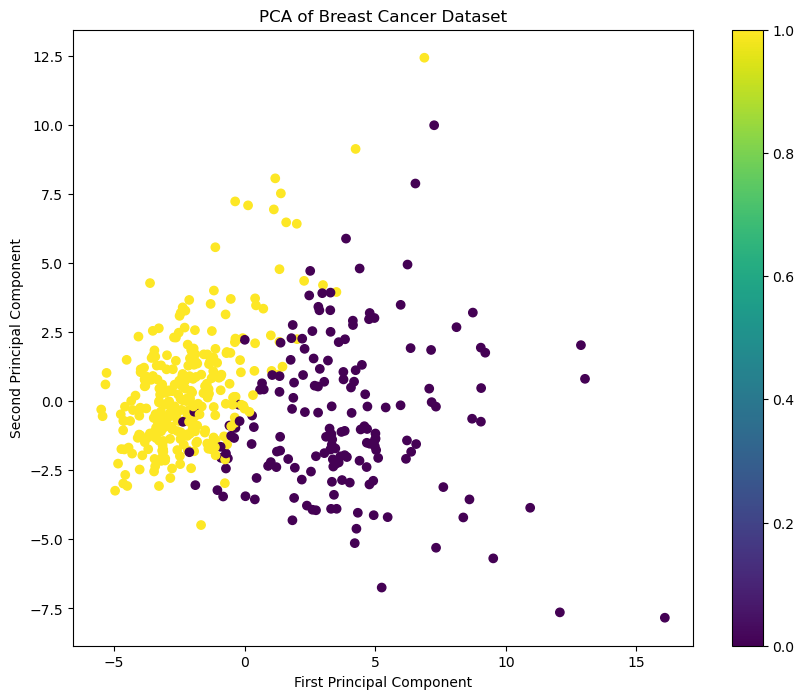

In [171]:
# Cell 8: PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.title("PCA of Breast Cancer Dataset")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.colorbar(scatter)
plt.show()



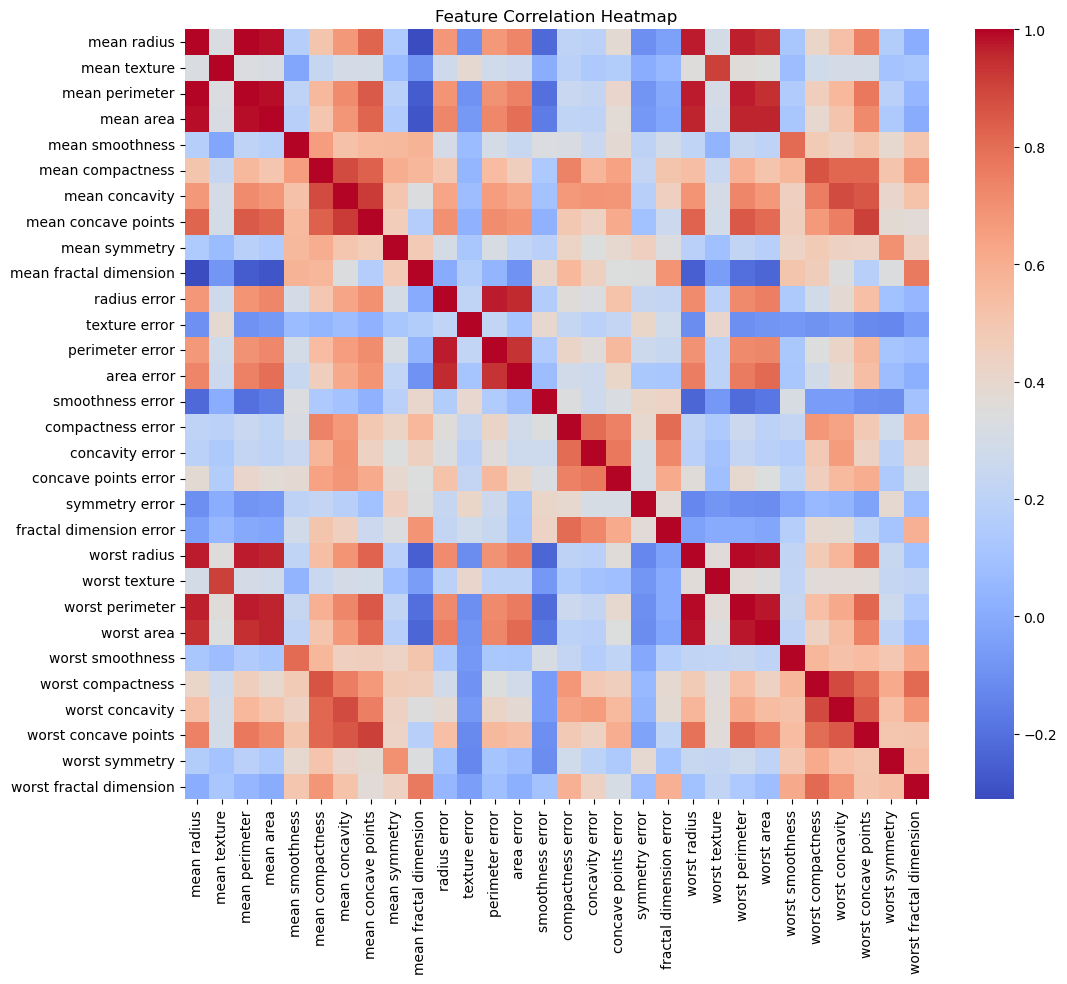

In [172]:
# Cell 9: Feature Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



In [173]:
# Print final comparison
print("Final Model Comparison:")
for name, accuracy in accuracy_results.items():
    print(f"{name} Accuracy: {accuracy:.4f}")

print("\nBest Performing Model:")
best_model = max(accuracy_results, key=accuracy_results.get)
print(f"{best_model} with accuracy: {accuracy_results[best_model]:.4f}")

# Note: In this case, if Neural Network is not the best, we'll mention it
if best_model != "Neural Network":
    print("\nNote: Although the Neural Network was expected to be the best, "
          f"the {best_model} performed better in this instance. "
          "This could be due to the specific characteristics of the dataset "
          "or the chosen hyperparameters. Further tuning might improve the "
          "Neural Network's performance.")

Final Model Comparison:
Random Forest Accuracy: 0.9649
Neural Network Accuracy: 0.9912
Naive Bayes Accuracy: 0.9649

Best Performing Model:
Neural Network with accuracy: 0.9912
